# Assignment 4:
# Original author: FBB
# Completed by Jonathan Toy @jontoy

    test if the distribution of ages is the same for 
    
    1) male and female riders
    
    2) day and night riders
    
    use 3 tests: KS, Pearson's, Spearman's. 
    
    For the KS do the test with the entire dataset and with a subset 200 times smaller
    
    Choose a significant threshold for the whole eercise. 
    
    For each test phrase the Null Hypothesis in words.
    
    Describe the return of the scipy function you use in each case.
    
    State the result in terms of rejection of the Null.

In [3]:
# my usual imports and setups
import pylab as pl
import pandas as pd
import numpy as np
#imports downloader
#from getCitiBikeCSV import getCitiBikeCSV

%pylab inline

import os
#this makes my plots pretty! but it is totally not mandatory to do it
#import json
#s = json.load( open(os.getenv ('PUI2016')+"/fbb_matplotlibrc.json") )
#pl.rcParams.update(s)



Populating the interactive namespace from numpy and matplotlib


### For this analysis we will be using a reasonable significance threshold of $\alpha = 0.05$. 

# I am reading in data from January 2015. It would be a good idea to use data from warmer months, since there are more riders in the warm weather and the more data the smaller the STATISTICAL NOISE. You should use data from multiple months, joining multiple datasets, thus addressing systematic errors as well

### In order to reduce systematic errors, we will be reading in data from both January 1015 and June 2015 and combining the data sets.

In [ ]:
#datestring = '201501'
#getCitiBikeCSV(datestring)

In [53]:
#df = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring + '-citibike-tripdata.csv')

df1 = pd.read_csv("201501-citibike-tripdata.csv")
df2 = pd.read_csv("201506-citibike-tripdata.csv")
df = pd.concat([df1,df2],ignore_index=True)
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,1346,1/1/2015 0:01,1/1/2015 0:24,455,1 Ave & E 44 St,40.750020,-73.969053,265,Stanton St & Chrystie St,40.722293,-73.991475,18660,Subscriber,1960.0,2
1,363,1/1/2015 0:02,1/1/2015 0:08,434,9 Ave & W 18 St,40.743174,-74.003664,482,W 15 St & 7 Ave,40.739355,-73.999318,16085,Subscriber,1963.0,1
2,346,1/1/2015 0:04,1/1/2015 0:10,491,E 24 St & Park Ave S,40.740964,-73.986022,505,6 Ave & W 33 St,40.749013,-73.988484,20845,Subscriber,1974.0,1
3,182,1/1/2015 0:04,1/1/2015 0:07,384,Fulton St & Waverly Ave,40.683178,-73.965964,399,Lafayette Ave & St James Pl,40.688515,-73.964763,19610,Subscriber,1969.0,1
4,969,1/1/2015 0:05,1/1/2015 0:21,474,5 Ave & E 29 St,40.745168,-73.986831,432,E 7 St & Avenue A,40.726218,-73.983799,20197,Subscriber,1977.0,1


In [56]:
df.columns


Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender', 'ageM', 'ageF'],
      dtype='object')

# BY GENDER
splitting data by gender and extracting the age happens in the cell below

In [55]:
#df is the dataframe where the content of the csv file is stored
df['ageM'] = 2015 - df['birth year'][(df['usertype'] == 'Subscriber') & (df['gender'] == 1)]
df['ageF'] = 2015 - df['birth year'][(df['usertype'] == 'Subscriber') & (df['gender'] == 2)]

In [57]:
#dropping some data I no longer need

#we only need to keep the new columns 'ageM' and 'ageF' to compare age distributions by gender
#so we will drop all other columns
df.drop(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender'], axis=1, inplace=True)
df.head()

,ageM,ageF
0,NaN,55.0
1,52.0,NaN
2,41.0,NaN
3,46.0,NaN
4,38.0,NaN


In [58]:
#your df should look something like this
# look at these data carefully... you may see someinteresting values!
df.describe()

//anaconda/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,ageM,ageF
count,849344.000000,240748.000000
mean,39.433173,37.821490
std,11.525830,11.276945
min,16.000000,16.000000
25%,NaN,NaN
50%,NaN,NaN
75%,NaN,NaN
max,130.000000,114.000000


### The minimum age of 16 years old is reasonable since a credit card is required to use citibikes, but the maximum age for males of 130 years and 114 years for females does not look to be reliable.

In [59]:
# dropping NaN values
df['ageM'].dropna(inplace= True)
df['ageF'].dropna(inplace= True)

lets split age in 5 year bins. the dataset is very large, so i could be split in smaller bins, but I will chose 5 years in the interest of time. 
the bin size choice should be a balance between properly sample the age space, have enough counts in each bin that the statistical noise is not significant (remember that is > sqrt(N)!) and the computational requirement to computatinal facilities ratio. 

the next several steps are needed if you want to code up the KS test from scratch. that is for extra credit, so if you do not want to do it you may not need to plot split the distribution in bins and create the cumulative HOWEVER it is a great idea to do it anyways to explore your data viaually! remember Ascombe's quartet!!

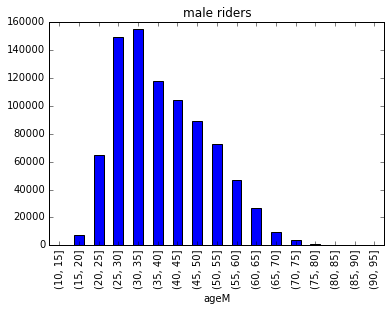

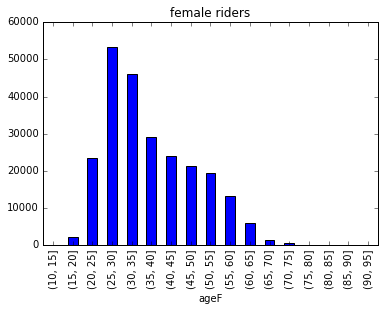

In [68]:
# plotting histogramswith pandas is a bitdifferent than with pylab
# this is a VERY USEFUL syntaxfor you to knonw!
bins = np.arange(10, 99, 5)
axM = df.ageM.groupby(pd.cut(df.ageM, bins)).agg([count_nonzero]).plot(kind='bar', 
                                                                legend=False)
axM.set_title("male riders")
axF = df.ageF.groupby(pd.cut(df.ageF, bins)).agg([count_nonzero]).plot(kind='bar',
                                                                legend=False)
axF.set_title("female riders")


# Figure 1: histogrammed distribution of riders' ages by gender

this is how the cumulative distributions look like.  Notice that i am normalizing them! if i want to reat an observed distribution like a probablility distribution i have to normalize it

          count_nonzero
ageM                   
(10, 15]       0.000000
(15, 20]       0.000427
(20, 25]       0.021837
(25, 30]       0.067869
(30, 35]       0.076755
(35, 40]       0.059519
(40, 45]       0.035871
(45, 50]       0.019538
(50, 55]       0.014332
(55, 60]       0.014502
(60, 65]       0.007927
(65, 70]       0.002727
(70, 75]       0.000118
(75, 80]       0.000129
(80, 85]       0.000014
(85, 90]       0.000025
(90, 95]       0.000000


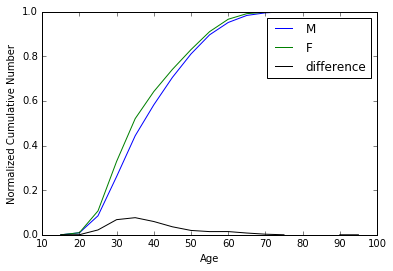

In [69]:
#print df.ageS, df.ageS.cumsum()

csM=df.ageM.groupby(pd.cut(df.ageM, bins)).agg([count_nonzero]).cumsum()

csF=df.ageF.groupby(pd.cut(df.ageF, bins)).agg([count_nonzero]).cumsum()

print (np.abs(csM / csM.max()-csF / csF.max()))

pl.plot(bins[:-1] + 5, csM / csM.max(), label = "M")
pl.plot(bins[:-1] + 5, csF / csF.max(), label = "F")
pl.plot(bins[:-1] + 5, np.sqrt(csF / csF.max() - csM / csM.max())**2, 'k-',
        label = "difference")
pl.xlabel("Age")
pl.ylabel("Normalized Cumulative Number")
pl.legend()

# Figure 2: the cumulative distribution of CitiBike riders' ages by gender

They look similar! But the difference gets to 10%. If I wanted to code the KS test by hand I woud have everything I need: the normalized cumulative distributions can be subtracted from each other and the max distance can calculated. 

Notice that there may be NaN values you are gonna have to deal with! 
You can do that for example with a Boolean statementsuch as  df.ageF[~np.isnan(df.ageF)] or you can use numpy functions that deal with Nan values: nansum, nanmean, nanstd...

lets run the scipy KS test

In [62]:
import scipy.stats

# KS tests to compare 2 samples

http://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.stats.ks_2samp.html


In [63]:
ks = scipy.stats.ks_2samp(df.ageM, df.ageF)
print (ks)

Ks_2sampResult(statistic=0.10214351942473293, pvalue=0.0)


# FILL IN THE CELL BELOW!

## The scipy KS test returns a p-value that is far below even a reasonable $\alpha$ value of 0.05, which means that the null hypothesis, which is that the male and female riders' ages were sampled from the same probability distribution, can safely be rejected, and thus the riders' ages follow different ages based on gender.





The scipy.stats KS test already tells me the significance and the p-value. 

The next few cells are here just to show you how you would obtain the same result by hand, but they are **not required**. 

Remember: the Null hypothesis is rejected if 

$D_KS(n1,n2) > c(\alpha) \sqrt{\frac{(n1 + n2)}{n1n2}}$

(see class notes) where $c(\alpha$) is the inverse of the KS distribution, and you do not have to know how to get that cause there are tables that list critical values!! 

http://www.real-statistics.com/tests-normality-and-symmetry/statistical-tests-normality-symmetry/kolmogorov-smirnov-test/kolmogorov-distribution/

But also this result depends in your choice of binning through, and thustheresultyou get by hand may not be exactly the same as the one the KS returns. Either way: this is how you would calculate the KS statistics by hand.

In [ ]:
#here is the critical values tablel. Have you chosen your significance level yet?? you should do it first thing!
from IPython.display import Image
#Image(filename="../plotsforclasses/ks2sample_table.png")

# Now redo the test with a subsample of the data: take only 1 ride every of 200 

In [64]:
ks200 = scipy.stats.ks_2samp(df.ageM[::200], df.ageF[::200])
print (ks200)

Ks_2sampResult(statistic=0.13317197912616863, pvalue=5.4202171815312343e-15)


## We have redone the KS test taking a subset of 1 out of every 200 rides in the merged database. While the p-value is larger than in the previous case, it is still far below the significance threshold of 0.05. Thus even in the case that we use this subsample of reduced size, we can safely reject the null hypothesis that male and female riders have ages following the same probability distribution.

# Pearson's  test for correlation

## notice that the Pearson's is a pairwise test: the samples need to be 
## a. sorted and 
## b. the same size!

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html#scipy.stats.pearsonr



In [99]:
# your code here!
# wrangle the data as needed
# please perform the Pearson's test 
# and tell me what you find in terms of NULL hypothesis

# we first take a subsample of size 30000 from both the male and female group
# then order these subsamples by age, and pair them to use in the pearson test.
ageM_samp = df['ageM'].sample(n=30000)
ageF_samp = df['ageF'].sample(n=30000)
ageM_sort_samp = ageM_samp.sort_values()
ageF_sort_samp = ageF_samp.sort_values()

scipy.stats.pearsonr(ageM_sort_samp, ageF_sort_samp)

(0.99655726994904392, 0.0)

## Our pearson test has a p-value of approximately 0, which is far below the significance threshold of 0.05. This tells us that we can safely reject the null hypothesis, which in this case is the hypothesis that female and male riders' ages come from normal distributions and are completely uncorrelated from one another.

# Spearman's  test for correlation

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.spearmanr.html#scipy.stats.spearmanr

In [100]:
# your code here!
# wrangle the data as needed
# please perform the Spearman's test and tell me what you find in terms of NULL hypothesis

scipy.stats.spearmanr(ageM_sort_samp, ageF_sort_samp)

SpearmanrResult(correlation=0.99904595807348207, pvalue=0.0)

## please comment on the numbers that you get in the light of the scipy manual: what is rerutned? what does it mean??

## The Spearman test returned a p-value of approximately 0, which is far below the critical threshold of 0.05, indicating that the null hypothesis that female and male riders' ages are completely uncorrelated from one another can safely be rejected. The correlation coefficient of approximately 0.999 indicates that the two data sets have a highly and positively monotonic relationship.

## EXTRA CREDIT:  CHOOSE ONE OF THE TESTS, AND TEST THE CORRELATION OF AGES  OF RIDERS DURING THE DAY VS DURING THE NIGHT!

